In [7]:
import os
import matplotlib.pyplot as plt
folder_path = r"C:\Users\ambat\OneDrive\Desktop\DATASET-20251203T133241Z-1-001\DATASET"
print(os.listdir(folder_path))


['clear skin', 'dark spots', 'puffy eyes', 'wrinkles']


clear skin: 300 images
Dark spots: 303 images
puffy eyes: 300 images
wrinkles: 300 images


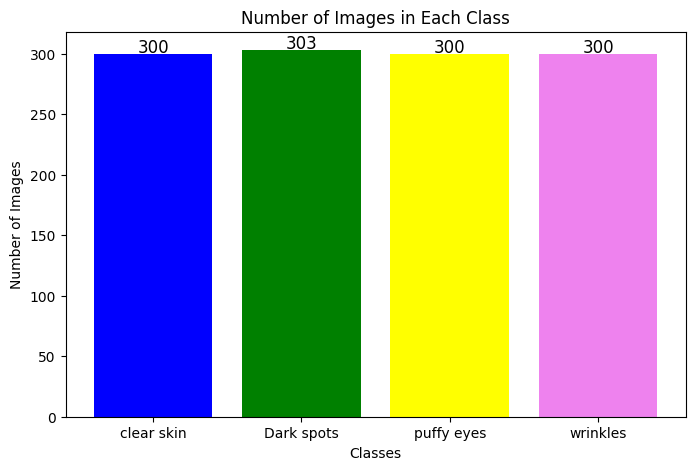

In [2]:

image_exts = (".jpg", ".jpeg", ".png", ".bmp", ".gif")
classes = ["clear skin","Dark spots","puffy eyes","wrinkles"]
counts = []

#image count
for c in classes:
    folder = os.path.join(folder_path, c)

    count = sum(
        1 for f in os.listdir(folder)
        if os.path.isfile(os.path.join(folder, f))
        and f.lower().endswith(image_exts)
    )

    counts.append(count)
    print(f"{c}: {count} images")
   

plt.figure(figsize=(8,5))

colors = ['blue', 'green', 'yellow', 'violet']

# bar chart
plt.bar(classes, counts, color=colors)

plt.title("Number of Images in Each Class")
plt.xlabel("Classes")
plt.ylabel("Number of Images")


for i, count in enumerate(counts):
    plt.text(i, count + 1, str(count), ha='center', fontsize=12)

plt.show()

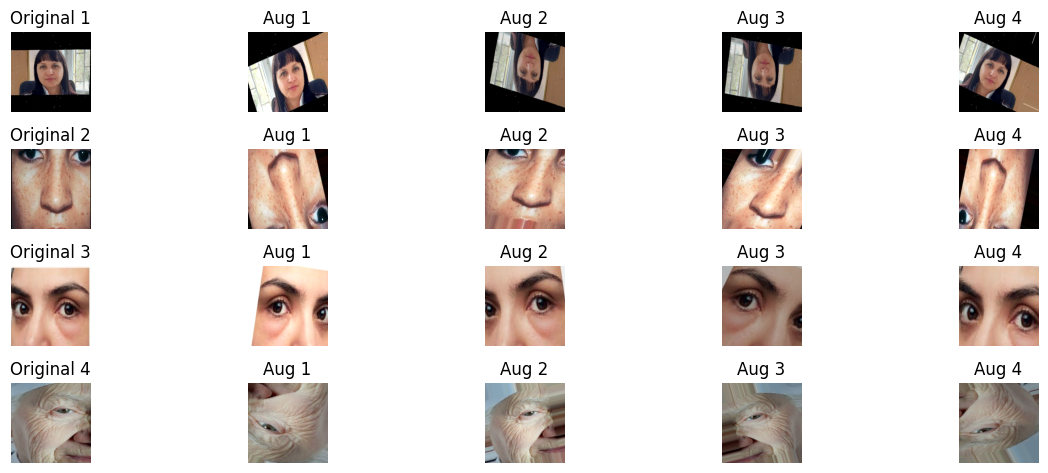

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
import numpy as np
image_list = [
   r"C:\Users\ambat\Downloads\DATASET-20251203T133241Z-1-001\DATASET\clear skin\clear_skin_061.jpg",
   r"C:\Users\ambat\Downloads\DATASET-20251203T133241Z-1-001\DATASET\dark spots\2de295c0-801d-429e-8f74-fce181cc87cc.jpg", 
   r"C:\Users\ambat\Downloads\DATASET-20251203T133241Z-1-001\DATASET\puffy eyes\14.jpg", 
   r"C:\Users\ambat\Downloads\DATASET-20251203T133241Z-1-001\DATASET\wrinkles\36.jpg"
]

# Augmentation Configuration 
aug = ImageDataGenerator(
    rotation_range=30,
    zoom_range=0.25,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=[0.7, 1.3],
    horizontal_flip=True,
    vertical_flip=True
)

#  Displaying  
rows = 5        
cols = 5                         

plt.figure(figsize=(12, 6))

for row, img_list in enumerate(image_list):

    # Load image
    original = load_img(img_list, target_size=(224, 224))
    arr = img_to_array(original)
    arr = np.expand_dims(arr, axis=0)

    # Show Original Image 
    plt.subplot(rows, cols, row * cols + 1)
    plt.imshow(original)
    plt.title(f"Original {row+1}")
    plt.axis("off")

    # Show Augmented images
    for j in range(4):
        augmented = next(aug.flow(arr, batch_size=1))[0].astype("uint8")
        plt.subplot(rows, cols, row * cols + (j + 2))
        plt.imshow(augmented)
        plt.title(f"Aug {j+1}")
        plt.axis("off")

plt.tight_layout()
plt.show()

EfficientNetB0

Found 963 images belonging to 4 classes.
Found 239 images belonging to 4 classes.
Number of classes: 4


Model: "functional_26"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_23      │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_12        │ (None, 224, 224,  │          0 │ input_layer_23[0… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization_6     │ (None, 224, 224,  │          7 │ rescaling_12[0][… │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_13        │ (None, 224, 224,  │          0 │ normalization_6[… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 225, 225,  │          0 │ rescaling_13[0][… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 112, 112,  │        864 │ stem_conv_pad[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 112, 112,  │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 112, 112,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 112, 112,  │        288 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 112, 112,  │        128 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 112, 112,  │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 32)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 32)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 8)   │        264 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 32)  │        288 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 112, 112,  │          0 │ block1a_activati… │
│ (Multiply)          │ 32)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 112, 112,  │        512 │ block1a_se_excit

 Total params: 4,378,535 (16.70 MB)

 Trainable params: 1,825,124 (6.96 MB)

 Non-trainable params: 2,553,411 (9.74 MB)

Epoch 1/30
61/61 ━━━━━━━━━━━━━━━━━━━━ 49s 570ms/step - accuracy: 0.2980 - loss: 1.4106 - val_accuracy: 0.4268 - val_loss: 1.3047 - learning_rate: 1.0000e-05
Epoch 2/30
61/61 ━━━━━━━━━━━━━━━━━━━━ 24s 395ms/step - accuracy: 0.3925 - loss: 1.2898 - val_accuracy: 0.5774 - val_loss: 1.1590 - learning_rate: 1.0000e-05
Epoch 3/30
61/61 ━━━━━━━━━━━━━━━━━━━━ 25s 406ms/step - accuracy: 0.5337 - loss: 1.1745 - val_accuracy: 0.6569 - val_loss: 1.0482 - learning_rate: 1.0000e-05
Epoch 4/30
61/61 ━━━━━━━━━━━━━━━━━━━━ 24s 399ms/step - accuracy: 0.6241 - loss: 1.0748 - val_accuracy: 0.7238 - val_loss: 0.9550 - learning_rate: 1.0000e-05
Epoch 5/30
61/61 ━━━━━━━━━━━━━━━━━━━━ 24s 390ms/step - accuracy: 0.6376 - loss: 1.0092 - val_accuracy: 0.8285 - val_loss: 0.8801 - learning_rate: 1.0000e-05
Epoch 6/30
61/61 ━━━━━━━━━━━━━━━━━━━━ 24s 399ms/step - accuracy: 0.6646 - loss: 0.9613 - val_accuracy: 0.7950 - val_loss: 0.8063 - learning_rate: 1.0000e-05
Epoch 7/30
61/61 ━━━━━━━━━━━━━━━━━━━━ 25s 406ms/step - acc

 Model saved as efficientnetb0_model.h5

Training Accuracy   : 87.12%
Validation Accuracy : 90.79%


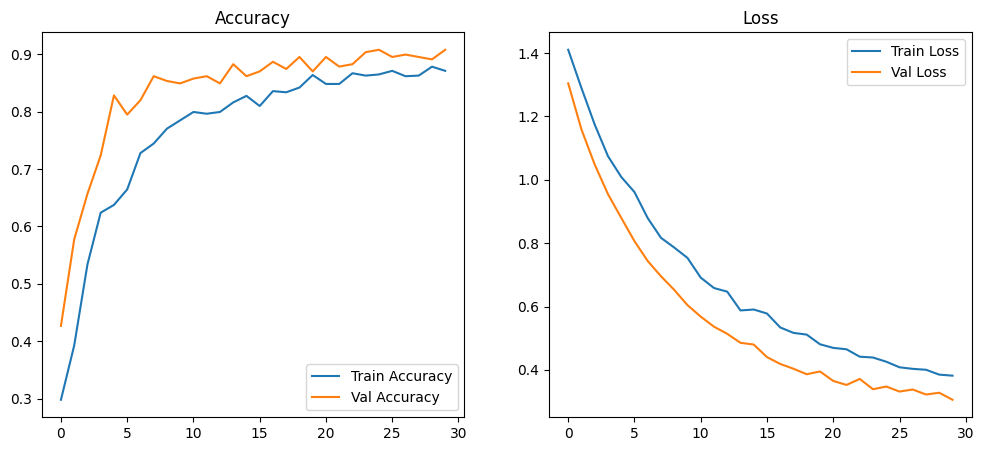

In [30]:
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt

DATASET_PATH = r"C:\Users\ambat\OneDrive\Desktop\DATASET-20251203T133241Z-1-001\DATASET"
IMG_SIZE = 224
BATCH_SIZE = 16
EPOCHS = 30

datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    validation_split=0.2,
    rotation_range=15,
    zoom_range=0.15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

train_gen = datagen.flow_from_directory(
    DATASET_PATH,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="training",
    shuffle=True
)

val_gen = datagen.flow_from_directory(
    DATASET_PATH,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="validation",
    shuffle=False
)

NUM_CLASSES = train_gen.num_classes
print("Number of classes:", NUM_CLASSES)


# MODEL: EfficientNetB0

base_model = EfficientNetB0(
    weights="imagenet",
    include_top=False,
    input_shape=(IMG_SIZE, IMG_SIZE, 3)
)

for layer in base_model.layers[:-30]:
    layer.trainable = False
for layer in base_model.layers[-30:]:
    layer.trainable = True

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation="relu")(x)
x = Dropout(0.3)(x)
output = Dense(NUM_CLASSES, activation="softmax")(x)

model = Model(inputs=base_model.input, outputs=output)

# COMPILE

model.compile(
    optimizer=Adam(learning_rate=1e-5),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()


# CALLBACKS

callbacks = [
    EarlyStopping(
        monitor="val_loss",
        patience=6,
        restore_best_weights=True
    ),
    ReduceLROnPlateau(
        monitor="val_loss",
        factor=0.3,
        patience=3,
        min_lr=1e-7
    )
]

# TRAIN

history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=EPOCHS,
    callbacks=callbacks
)

# SAVE MODEL

model.save("efficientnetb0_model.h5")
print(" Model saved as efficientnetb0_model.h5")

# FINAL ACCURACY

train_acc1 = history.history["accuracy"][-1] * 100
val_acc1 = history.history["val_accuracy"][-1] * 100

print(f"\nTraining Accuracy   : {train_acc1:.2f}%")
print(f"Validation Accuracy : {val_acc1:.2f}%")

# PLOTS

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Val Accuracy")
plt.legend()
plt.title("Accuracy")

plt.subplot(1,2,2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.legend()
plt.title("Loss")

plt.show()

Resnet50

Found 963 images belonging to 4 classes.
Found 239 images belonging to 4 classes.


Model: "functional_25"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_22      │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_22[0… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 23,727,300 (90.51 MB)

 Trainable params: 135,492 (529.27 KB)

 Non-trainable params: 23,591,808 (90.00 MB)

Epoch 1/40
61/61 ━━━━━━━━━━━━━━━━━━━━ 40s 597ms/step - accuracy: 0.3146 - loss: 2.7515 - val_accuracy: 0.4728 - val_loss: 1.6076 - learning_rate: 5.0000e-05
Epoch 2/40
61/61 ━━━━━━━━━━━━━━━━━━━━ 35s 572ms/step - accuracy: 0.3884 - loss: 2.4407 - val_accuracy: 0.6276 - val_loss: 1.3803 - learning_rate: 5.0000e-05
Epoch 3/40
61/61 ━━━━━━━━━━━━━━━━━━━━ 35s 580ms/step - accuracy: 0.4673 - loss: 2.1743 - val_accuracy: 0.6653 - val_loss: 1.2710 - learning_rate: 5.0000e-05
Epoch 4/40
61/61 ━━━━━━━━━━━━━━━━━━━━ 40s 655ms/step - accuracy: 0.5078 - loss: 1.9937 - val_accuracy: 0.7364 - val_loss: 1.1568 - learning_rate: 5.0000e-05
Epoch 5/40
61/61 ━━━━━━━━━━━━━━━━━━━━ 49s 797ms/step - accuracy: 0.5099 - loss: 1.9432 - val_accuracy: 0.7741 - val_loss: 1.1286 - learning_rate: 5.0000e-05
Epoch 6/40
61/61 ━━━━━━━━━━━━━━━━━━━━ 49s 806ms/step - accuracy: 0.5337 - loss: 1.7970 - val_accuracy: 0.7573 - val_loss: 1.1063 - learning_rate: 5.0000e-05
Epoch 7/40
61/61 ━━━━━━━━━━━━━━━━━━━━ 49s 803ms/step - acc

Model saved successfully

Final Training Accuracy   : 95.43%
Final Validation Accuracy : 89.12%


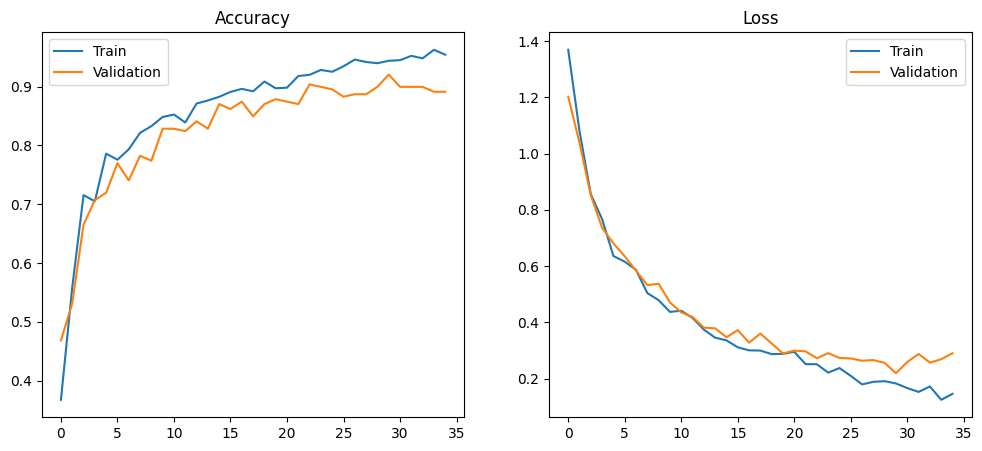

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt

IMG_SIZE = 224
BATCH_SIZE = 16
EPOCHS = 40
NUM_CLASSES = 4
DATASET_PATH = r"C:\Users\ambat\OneDrive\Desktop\DATASET-20251203T133241Z-1-001\DATASET"

datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    validation_split=0.2,
    rotation_range=35,
    width_shift_range=0.25,
    height_shift_range=0.25,
    zoom_range=0.3,
    horizontal_flip=True,
    brightness_range=[0.7, 1.3]
)

train_generator = datagen.flow_from_directory(
    DATASET_PATH,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="training"
)

val_generator = datagen.flow_from_directory(
    DATASET_PATH,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="validation"
)


# RESNET50  MODEL 

base_model = ResNet50(
    weights="imagenet",
    include_top=False,
    input_shape=(IMG_SIZE, IMG_SIZE, 3)
)

base_model.trainable = False 


x = base_model.output
x = GlobalAveragePooling2D()(x)
x = BatchNormalization()(x)

x = Dense(
    64,
    activation="relu",
    kernel_regularizer=l2(0.002)
)(x)

x = Dropout(0.7)(x)

output = Dense(
    NUM_CLASSES,
    activation="softmax",
    kernel_regularizer=l2(0.002)
)(x)

model = Model(inputs=base_model.input, outputs=output)


model.compile(
    optimizer=Adam(learning_rate=5e-5),
    loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.1),
    metrics=["accuracy"]
)

model.summary()


early_stop = EarlyStopping(
    monitor="val_loss",
    patience=6,
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.2,
    patience=3,
    min_lr=1e-6
)


history_resnet50 = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=EPOCHS,
    callbacks=[early_stop, reduce_lr]
)

# SAVE MODEL

model.save("resnet50_final.h5")
print("Model saved successfully")


# ACCURACY

train_acc2 = history.history["accuracy"][-1] * 100
val_acc2 = history.history["val_accuracy"][-1] * 100


print(f"\nFinal Training Accuracy   : {train_acc2:.2f}%")
print(f"Final Validation Accuracy : {val_acc2:.2f}%")

# PLOTS

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Loss')
plt.legend()

plt.show()

MobileNetV2

Found 963 images belonging to 4 classes.
Found 239 images belonging to 4 classes.
Number of classes: 4


Model: "functional_27"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_24      │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer_24[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,586,948 (9.87 MB)

 Trainable params: 2,010,500 (7.67 MB)

 Non-trainable params: 576,448 (2.20 MB)

Epoch 1/35
61/61 ━━━━━━━━━━━━━━━━━━━━ 34s 414ms/step - accuracy: 0.3209 - loss: 1.4928 - val_accuracy: 0.4351 - val_loss: 1.3405 - learning_rate: 1.0000e-05
Epoch 2/35
61/61 ━━━━━━━━━━━━━━━━━━━━ 22s 363ms/step - accuracy: 0.5410 - loss: 1.0873 - val_accuracy: 0.6025 - val_loss: 1.0227 - learning_rate: 1.0000e-05
Epoch 3/35
61/61 ━━━━━━━━━━━━━━━━━━━━ 22s 362ms/step - accuracy: 0.6739 - loss: 0.8925 - val_accuracy: 0.6778 - val_loss: 0.8350 - learning_rate: 1.0000e-05
Epoch 4/35
61/61 ━━━━━━━━━━━━━━━━━━━━ 22s 365ms/step - accuracy: 0.7227 - loss: 0.7575 - val_accuracy: 0.7155 - val_loss: 0.7429 - learning_rate: 1.0000e-05
Epoch 5/35
61/61 ━━━━━━━━━━━━━━━━━━━━ 23s 370ms/step - accuracy: 0.7445 - loss: 0.7002 - val_accuracy: 0.7782 - val_loss: 0.6340 - learning_rate: 1.0000e-05
Epoch 6/35
61/61 ━━━━━━━━━━━━━━━━━━━━ 22s 360ms/step - accuracy: 0.7726 - loss: 0.6135 - val_accuracy: 0.7824 - val_loss: 0.5692 - learning_rate: 1.0000e-05
Epoch 7/35
61/61 ━━━━━━━━━━━━━━━━━━━━ 22s 363ms/step - acc


 Model saved as mobilenetv2.h5

Final Training Accuracy   : 90.34%
Final Validation Accuracy : 87.87%


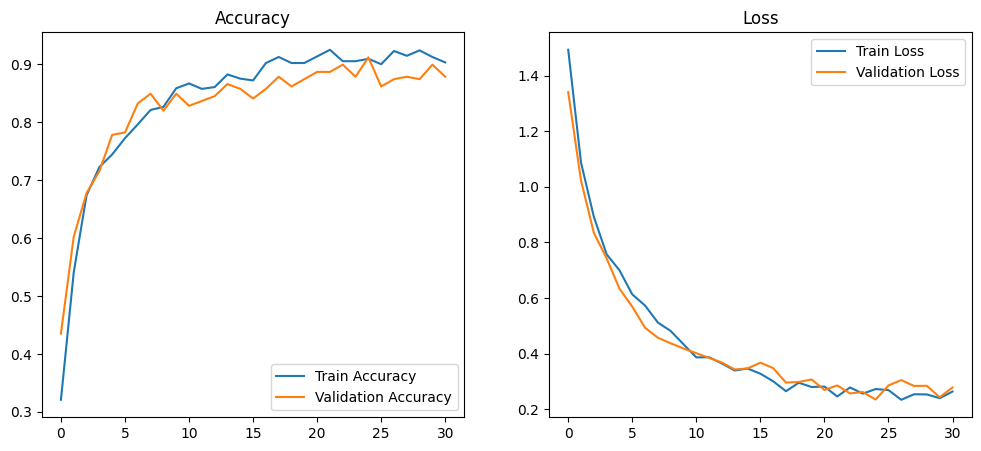

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
import numpy as np


IMG_SIZE = 224
BATCH_SIZE = 16
EPOCHS = 35

DATASET_PATH = r"C:\Users\ambat\OneDrive\Desktop\DATASET-20251203T133241Z-1-001\DATASET"


datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    validation_split=0.2,
    rotation_range=15,
    zoom_range=0.15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

train_gen = datagen.flow_from_directory(
    DATASET_PATH,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="training",
    shuffle=True
)

val_gen = datagen.flow_from_directory(
    DATASET_PATH,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="validation",
    shuffle=False
)

NUM_CLASSES = train_gen.num_classes
print("Number of classes:", NUM_CLASSES)

#  MOBILENETV2 

base_model = MobileNetV2(
    weights="imagenet",
    include_top=False,
    input_shape=(IMG_SIZE, IMG_SIZE, 3)
)

for layer in base_model.layers[:-40]:
    layer.trainable = False
for layer in base_model.layers[-40:]:
    layer.trainable = True

x = base_model.output
x = GlobalAveragePooling2D()(x)

x = Dense(256, activation="relu")(x)

x = Dropout(0.3)(x)

output = Dense(NUM_CLASSES, activation="softmax")(x)

model = Model(inputs=base_model.input, outputs=output)

# COMPILE

model.compile(
    optimizer=Adam(learning_rate=1e-5),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()

callbacks = [
    EarlyStopping(
        monitor="val_loss",
        patience=6,
        restore_best_weights=True
    ),
    ReduceLROnPlateau(
        monitor="val_loss",
        factor=0.3,
        patience=3,
        min_lr=1e-7
    )
]

# TRAINING

history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=EPOCHS,
    callbacks=callbacks
)

# SAVE MODEL 

model.save("mobilenetv2_best.h5")
print("\n Model saved as mobilenetv2.h5")

# FINAL ACCURACY
train_acc3 = history.history["accuracy"][-1] * 100
val_acc3 = history.history["val_accuracy"][-1] * 100


print(f"\nFinal Training Accuracy   : {train_acc3:.2f}%")
print(f"Final Validation Accuracy : {val_acc3:.2f}%")


# PLOT ACCURACY & LOSS

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.legend()
plt.title("Accuracy")

plt.subplot(1,2,2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.title("Loss")

plt.show()

In [ ]:
import pandas as pd

#  accuracy table
data = {
    "Model": ["MobileNetV2", "ResNet50", "EfficientNetB0"],
    "Training Accuracy (%)": [train_acc3, train_acc2, train_acc1],
    "Validation Accuracy (%)": [val_acc3, val_acc2, val_acc1]
}

df = pd.DataFrame(data)
df.index = df.index + 1
df.style.set_table_styles([
    {'selector': 'table', 'props': [('border', '2px solid white')]},
    {'selector': 'th', 'props': [('border', '1px solid White'), ('text-align', 'center')]},
    {'selector': 'td', 'props': [('border', '1px solid white'), ('text-align', 'center')]}
]).set_caption("FINAL MODEL PERFORMANCE COMPARISON")

,Model,Training Accuracy (%),Validation Accuracy (%)
1,MobileNetV2,90.342677,87.866110
2,ResNet50,95.430946,89.121342
3,EfficientNetB0,87.123573,90.794981


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


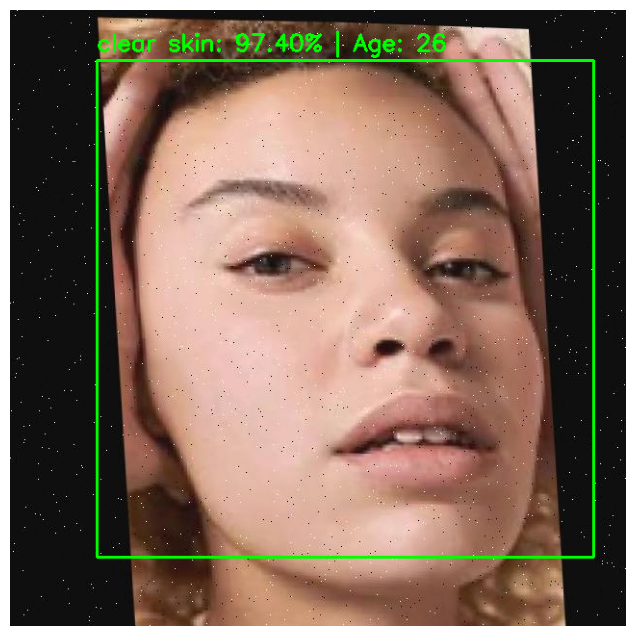

In [ ]:
import cv2
import numpy as np
import tensorflow as tf
import random
import matplotlib.pyplot as plt


skin_model = tf.keras.models.load_model(
    r"C:\Users\ambat\OneDrive\Desktop\dermalscan\.venv\mobilenetv2_best.h5"
)

class_names = ['clear skin', 'dark spots', 'puffy eyes', 'wrinkles']

face_cascade = cv2.CascadeClassifier(
    cv2.data.haarcascades + "haarcascade_frontalface_default.xml"
)
assert not face_cascade.empty(), "Haar Cascade not loaded"

# Age estimation function
def estimate_age(label, confidence=None):
    if label == "clear skin":
        return random.randint(18, 28)
    elif label == "puffy eyes":
        return random.randint(22, 32)
    elif label == "dark spots":
        return random.randint(28, 40)
    elif label == "wrinkles":
        return random.randint(40, 60)
    return 25

# Inference function
def run_inference(image_path, model, class_names):
    img = cv2.imread(image_path)
    assert img is not None, "Image not found"

    rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    
    faces = face_cascade.detectMultiScale(
        gray,
        scaleFactor=1.05,  
        minNeighbors=3,   
        minSize=(30, 30)   
    )

    for (x, y, w, h) in faces:
        face = rgb[y:y+h, x:x+w]
        face_resized = cv2.resize(face, (224, 224)) / 255.0
        face_resized = np.expand_dims(face_resized, axis=0)

        preds = model.predict(face_resized)[0]
        class_index = np.argmax(preds)

        label = class_names[class_index]
        confidence = preds[class_index] * 100
        age = estimate_age(label, confidence)

        text = f"{label}: {confidence:.2f}% | Age: {age}"

        
        cv2.rectangle(rgb, (x, y), (x+w, y+h), (0, 255, 0), 2)
        cv2.putText(
            rgb, text, (x, y-10),
            cv2.FONT_HERSHEY_SIMPLEX, 0.8,
            (0, 255, 0), 2
        )

    return rgb

# Image path
img_path = r"C:\Users\ambat\OneDrive\Desktop\DATASET-20251203T133241Z-1-001\DATASET\clear skin\clear_skin_063.jpg"

output_img = run_inference(img_path, skin_model, class_names)

# Display
plt.figure(figsize=(8,8))
plt.imshow(output_img)
plt.axis("off")
plt.show()